In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv('SimulationData.csv')
df

,Fluid Velocity (m/s),Radius (m),Wasp Velocity (m/s),Wasp Endurance (s),Trial 1,Trial 2,Trial 3,Average,Std Dev,Arrival Time
0,0.00,0.020,0.34,0.6,2106,2143,2169.0,2139.333333,31.659648,0.436450
1,0.12,0.020,0.34,0.6,1740,1770,1748.0,1752.666667,15.534907,0.458106
2,0.16,0.020,0.34,0.6,1560,1574,1579.0,1571.000000,9.848858,0.472414
3,0.22,0.020,0.34,0.6,1439,1420,1434.0,1431.000000,9.848858,0.485796
4,0.29,0.020,0.34,0.6,1483,1590,503.0,1192.000000,599.085136,0.507277
5,0.43,0.020,0.34,0.6,827,905,715.0,815.666667,95.505672,0.518199
6,0.51,0.020,0.34,0.6,570,533,612.0,571.666667,39.526363,0.520662
7,0.51,0.020,0.34,1.0,1019,1056,1013.0,1029.333333,23.288051,NaN
8,0.51,0.020,0.34,3.0,1354,1326,NaN,1340.000000,19.798990,NaN
9,0.51,0.020,0.42,0.6,1218,949,1209.0,1125.333333,152.775434,NaN


All simulations were run with a timestep of $dt=0.03s$ for 60 steps, with jitter, directional noise, and adjustment for angle turned on. The cylinder was centered at $x=0.25m$ and the wasp circle was centered at $x=0.40m$. Three trials were run for each parameter case, and the average and standard deviation were then calculated.

In [3]:
W34E06 = df[df['Wasp Velocity (m/s)']==0.34][df['Wasp Endurance (s)'] == 0.6][df['Radius (m)'] == 0.02]

<ipython-input-3-1afa4837f9a8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  W34E06 = df[df['Wasp Velocity (m/s)']==0.34][df['Wasp Endurance (s)'] == 0.6][df['Radius (m)'] == 0.02]
<ipython-input-3-1afa4837f9a8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  W34E06 = df[df['Wasp Velocity (m/s)']==0.34][df['Wasp Endurance (s)'] == 0.6][df['Radius (m)'] == 0.02]


In [4]:
W34E06

,Fluid Velocity (m/s),Radius (m),Wasp Velocity (m/s),Wasp Endurance (s),Trial 1,Trial 2,Trial 3,Average,Std Dev,Arrival Time
0,0.00,0.02,0.34,0.6,2106,2143,2169.0,2139.333333,31.659648,0.436450
1,0.12,0.02,0.34,0.6,1740,1770,1748.0,1752.666667,15.534907,0.458106
2,0.16,0.02,0.34,0.6,1560,1574,1579.0,1571.000000,9.848858,0.472414
3,0.22,0.02,0.34,0.6,1439,1420,1434.0,1431.000000,9.848858,0.485796
4,0.29,0.02,0.34,0.6,1483,1590,503.0,1192.000000,599.085136,0.507277
5,0.43,0.02,0.34,0.6,827,905,715.0,815.666667,95.505672,0.518199
6,0.51,0.02,0.34,0.6,570,533,612.0,571.666667,39.526363,0.520662
49,0.35,0.02,0.34,0.6,1094,1083,1088.0,1088.333333,5.507571,0.507277


-0.9980481733070664


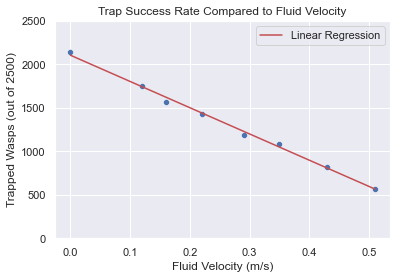

In [5]:
# W34E06.plot.scatter('Fluid Velocity (m/s)', 'Average', label="Experimental Results")

sns.scatterplot(data=W34E06, x="Fluid Velocity (m/s)", y="Average")

plt.ylabel('Trapped Wasps (out of 2500)')
plt.title('Trap Success Rate Compared to Fluid Velocity')
plt.ylim([0,2500])

slope, intercept, r_value, p_value, std_err = stats.linregress(W34E06['Fluid Velocity (m/s)'], W34E06['Average'])
x = np.arange(0,0.52,0.01)
y = slope * x + intercept
plt.plot(x, y, 'r-', label='Linear Regression')

plt.legend()

plt.savefig("FluidVelocity.jpg", dpi=500)
print(W34E06.corr()['Average']['Fluid Velocity (m/s)'])

Linear regression gives a slope of -3015.311244859438, an intercept of 2104.1892569634538, and $r=-0.9980481733070666 $ ($r^2=0.9961001562415726$).

Now to compare endurance times with success rate, this trend is similar among different fluid velocities and wasp flight speeds.

In [6]:
W34V51 = df[df['Wasp Velocity (m/s)'] == 0.34][df['Fluid Velocity (m/s)'] == 0.51][df['Radius (m)'] == 0.02]
W34V51

<ipython-input-6-2335aa473c61>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  W34V51 = df[df['Wasp Velocity (m/s)'] == 0.34][df['Fluid Velocity (m/s)'] == 0.51][df['Radius (m)'] == 0.02]
<ipython-input-6-2335aa473c61>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  W34V51 = df[df['Wasp Velocity (m/s)'] == 0.34][df['Fluid Velocity (m/s)'] == 0.51][df['Radius (m)'] == 0.02]


,Fluid Velocity (m/s),Radius (m),Wasp Velocity (m/s),Wasp Endurance (s),Trial 1,Trial 2,Trial 3,Average,Std Dev,Arrival Time
6,0.51,0.02,0.34,0.6,570,533,612.0,571.666667,39.526363,0.520662
7,0.51,0.02,0.34,1.0,1019,1056,1013.0,1029.333333,23.288051,NaN
8,0.51,0.02,0.34,3.0,1354,1326,NaN,1340.000000,19.798990,NaN
54,0.51,0.02,0.34,0.8,917,962,966.0,948.333333,27.209067,NaN
55,0.51,0.02,0.34,1.5,1225,1228,1220.0,1224.333333,4.041452,NaN
56,0.51,0.02,0.34,2.0,1283,1302,1291.0,1292.000000,9.539392,NaN


0.829571770400312 0.6881893222451081


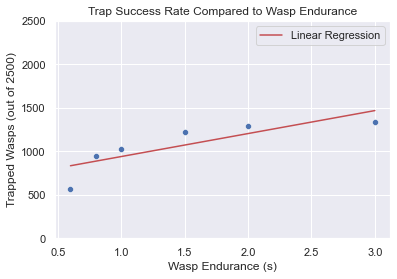

In [7]:
sns.scatterplot(data=W34V51, x='Wasp Endurance (s)', y='Average')
plt.title('Trap Success Rate Compared to Wasp Endurance')
plt.ylabel('Trapped Wasps (out of 2500)')
plt.ylim([0,2500])

slope, intercept, r_value, p_value, std_err = stats.linregress(W34V51['Wasp Endurance (s)'], W34V51['Average'])
x = np.arange(0.60,3.01,0.01)
y = slope * x + intercept
plt.plot(x, y, 'r-', label='Linear Regression')

plt.legend()

plt.savefig("WaspEndurance.jpg", dpi=500)
print(r_value, r_value**2)

All of the parameter groups follow a trend where there is diminishing return for the success rate as endurance increases. This is likely because most of the wasps are able to make it to the target before they run out of endurance when it is high enough. I will need to run more parameters to get a better handle on the shape of the graph. I haven't run a linear regression on this data because I am not sure whether it is linear or something else.

Now we will look at how the success rate varies from different wasp flight speeds while keeping other parameters constant.

In [8]:
E06V51 = df[df['Wasp Endurance (s)'] == 0.6][df['Fluid Velocity (m/s)'] == 0.51][df['Radius (m)'] == 0.02]
E06V51

<ipython-input-8-32d5773f1528>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  E06V51 = df[df['Wasp Endurance (s)'] == 0.6][df['Fluid Velocity (m/s)'] == 0.51][df['Radius (m)'] == 0.02]
<ipython-input-8-32d5773f1528>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  E06V51 = df[df['Wasp Endurance (s)'] == 0.6][df['Fluid Velocity (m/s)'] == 0.51][df['Radius (m)'] == 0.02]


,Fluid Velocity (m/s),Radius (m),Wasp Velocity (m/s),Wasp Endurance (s),Trial 1,Trial 2,Trial 3,Average,Std Dev,Arrival Time
6,0.51,0.02,0.34,0.6,570,533,612.0,571.666667,39.526363,0.520662
9,0.51,0.02,0.42,0.6,1218,949,1209.0,1125.333333,152.775434,NaN
12,0.51,0.02,0.50,0.6,1499,1479,1464.0,1480.666667,17.559423,NaN
51,0.51,0.02,0.40,0.6,863,1111,803.0,925.666667,163.282985,NaN
52,0.51,0.02,0.45,0.6,1346,1193,1170.0,1236.333333,95.667828,NaN
53,0.51,0.02,0.37,0.6,712,869,906.0,829.000000,103.000000,NaN


0.981750190775564


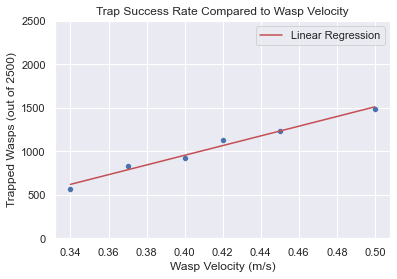

In [9]:
sns.scatterplot(data=E06V51, x='Wasp Velocity (m/s)', y='Average')
plt.ylabel('Trapped Wasps (out of 2500)')
plt.title('Trap Success Rate Compared to Wasp Velocity')
plt.ylim([0,2500])

slope, intercept, r_value, p_value, std_err = stats.linregress(E06V51['Wasp Velocity (m/s)'], E06V51['Average'])
x = np.arange(0.34,0.51,0.01)
y = slope * x + intercept
plt.plot(x, y, 'r-', label='Linear Regression')

plt.legend()

plt.savefig("WaspVelocity.jpg", dpi=500)
print(r_value**2)

Now to compare different cylinder sizes, there was some issue with running the $r=0.04m$ case with the current time step ($dt=0.03$). I then increased the time step to $dt=0.05$, and Planktos ran without any issues (recognizing sticky boundary collisions). This will need to be fixed when gathering final data.

In [10]:
V35W34 = df[df['Wasp Endurance (s)'] == 0.6][df['Fluid Velocity (m/s)'] == 0.35][df['Wasp Velocity (m/s)'] == 0.34]
V35W34

<ipython-input-10-a5c624f8003e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  V35W34 = df[df['Wasp Endurance (s)'] == 0.6][df['Fluid Velocity (m/s)'] == 0.35][df['Wasp Velocity (m/s)'] == 0.34]
<ipython-input-10-a5c624f8003e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  V35W34 = df[df['Wasp Endurance (s)'] == 0.6][df['Fluid Velocity (m/s)'] == 0.35][df['Wasp Velocity (m/s)'] == 0.34]


,Fluid Velocity (m/s),Radius (m),Wasp Velocity (m/s),Wasp Endurance (s),Trial 1,Trial 2,Trial 3,Average,Std Dev,Arrival Time
47,0.35,0.005,0.34,0.6,84,88,91.0,87.666667,3.511885,NaN
48,0.35,0.010,0.34,0.6,97,75,73.0,81.666667,13.316656,NaN
49,0.35,0.020,0.34,0.6,1094,1083,1088.0,1088.333333,5.507571,0.507277
50,0.35,0.040,0.34,0.6,2174,2142,NaN,2158.000000,22.627417,NaN


0.9855589092543766 0.9713263636106766


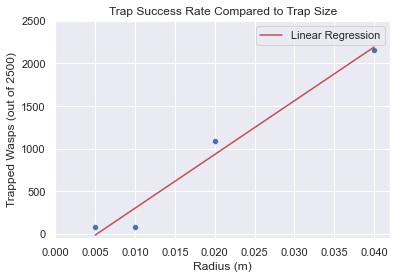

In [17]:
sns.scatterplot(data=V35W34, x="Radius (m)", y="Average", ci=None)
plt.title('Trap Success Rate Compared to Trap Size')
plt.ylabel('Trapped Wasps (out of 2500)')
plt.ylim([-50,2500])
plt.xlim([-0.0,0.042])

slope, intercept, r_value, p_value, std_err = stats.linregress(V35W34['Radius (m)'], V35W34['Average'])
x = np.arange(0.005,0.041,0.001)
y = slope * x + intercept
plt.plot(x, y, 'r-', label='Linear Regression')

plt.legend()

plt.savefig('VaryRadius.png', dpi=500)

print(r_value, r_value**2)

0.9669313253089705 0.9349561878637622


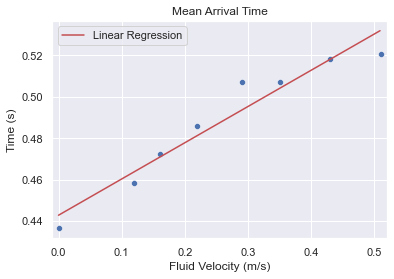

In [20]:
sns.scatterplot(data=W34E06, x="Fluid Velocity (m/s)", y="Arrival Time", ci=None)
plt.title('Mean Arrival Time')
plt.ylabel('Time (s)')
plt.xlim([-0.01,0.52])

slope, intercept, r_value, p_value, std_err = stats.linregress(W34E06['Fluid Velocity (m/s)'], W34E06['Arrival Time'])
x = np.arange(0.00,0.51,0.001)
y = slope * x + intercept
plt.plot(x, y, 'r-', label='Linear Regression')
plt.legend()

plt.savefig('MeanArrivalTime.png', dpi=500)

print(r_value, r_value**2)